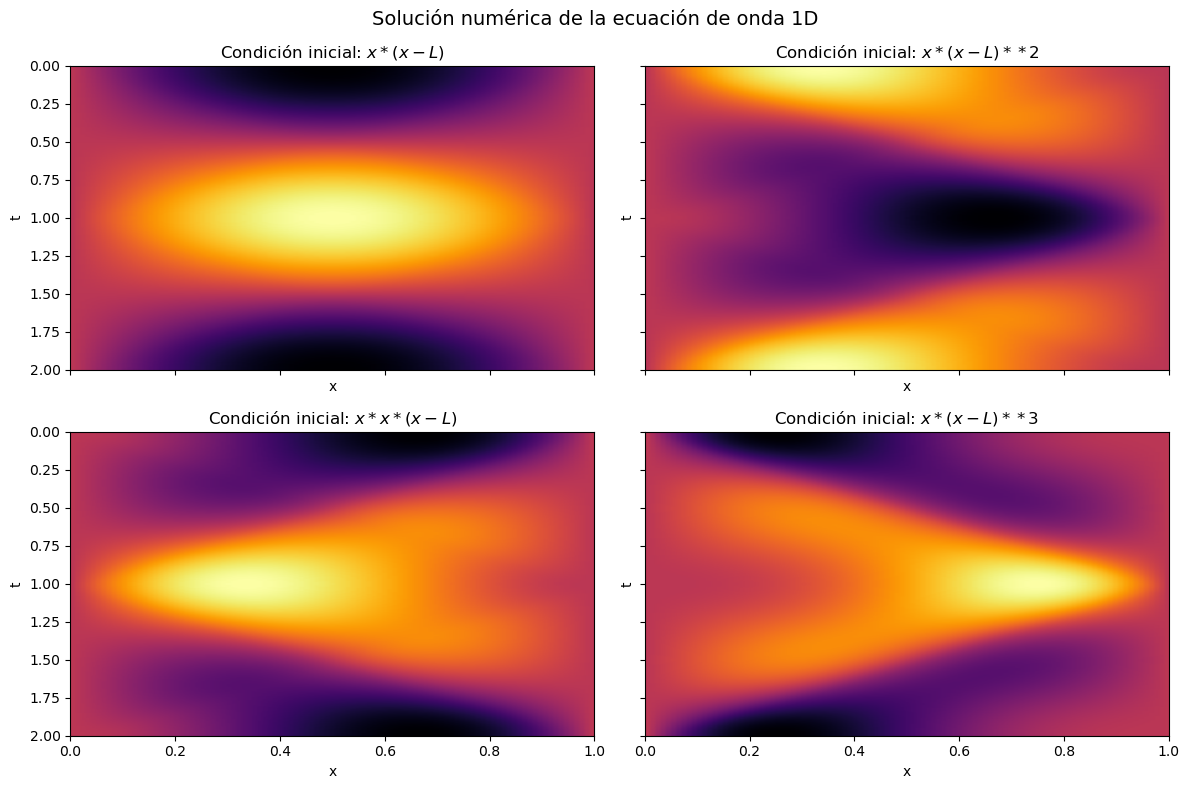

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos y numéricos
L = 1.0       # Longitud del dominio
T = 2.0       # Tiempo total de simulación
c = 1.0       # Velocidad de propagación

Nx = 100      # Número de puntos espaciales
Nt = 500      # Número de pasos temporales

dx = L / Nx
dt = T / Nt

x = np.linspace(0, L, Nx + 1)
t = np.linspace(0, T, Nt + 1)
r = c * dt / dx

assert r <= 1, f"Condición CFL no satisfecha: r = {r}"

# Lista de funciones iniciales y etiquetas
funcs = [
    (lambda x: x * (x - L), r"$x * (x - L)$"),
    (lambda x: x*(x-L)**2, r"$x*(x-L)**2$"),
    (lambda x: x * x * (x - L), r"$x * x * (x - L)$"),
    (lambda x: x*(x-L)**3, r"$x*(x-L)**3$")
]

def solve_wave(f):
    """Resuelve la ecuación de onda 1D para una función inicial f(x)"""
    u0 = f(x)
    u = np.zeros((Nt + 1, Nx + 1))
    u[0, :] = u0
    # Primer paso temporal
    u[1, 1:-1] = u0[1:-1] + 0.5 * r**2 * (u0[2:] - 2 * u0[1:-1] + u0[:-2])
    # Iteración en el tiempo
    for n in range(1, Nt):
        u[n + 1, 1:-1] = (2 * (1 - r**2) * u[n, 1:-1] - u[n - 1, 1:-1] +
                          r**2 * (u[n, 2:] + u[n, :-2]))
    return u

# Crear figura de mapas de calor
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, (f, label) in enumerate(funcs):
    u = solve_wave(f)
    im = axes[i].imshow(u, extent=[0, L, T, 0], aspect='auto', cmap='inferno')
    axes[i].set_title(f"Condición inicial: {label}", fontsize=12)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("t")

# Agregar barra de color común
# cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.9, label='u(x,t)')
plt.suptitle("Solución numérica de la ecuación de onda 1D", fontsize=14)
plt.tight_layout()
plt.show()
